<a href="https://colab.research.google.com/github/Caterpillar-T/MAT-421/blob/main/Homework_11_MAT421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework #11 MAT 421

Kyle Tucker

**Section 22.4: Numerical Error and Instability**

Stability refers to how the error changes over time. In the even error does not increase or grow then the scheme is considered stable. Naturally, if the error does grow then it is considered unstable.

A textbook example for stability is using Euler Explicit, Euler Implicit, and Trapezdoidal Formulas to look at the pendulum equation.

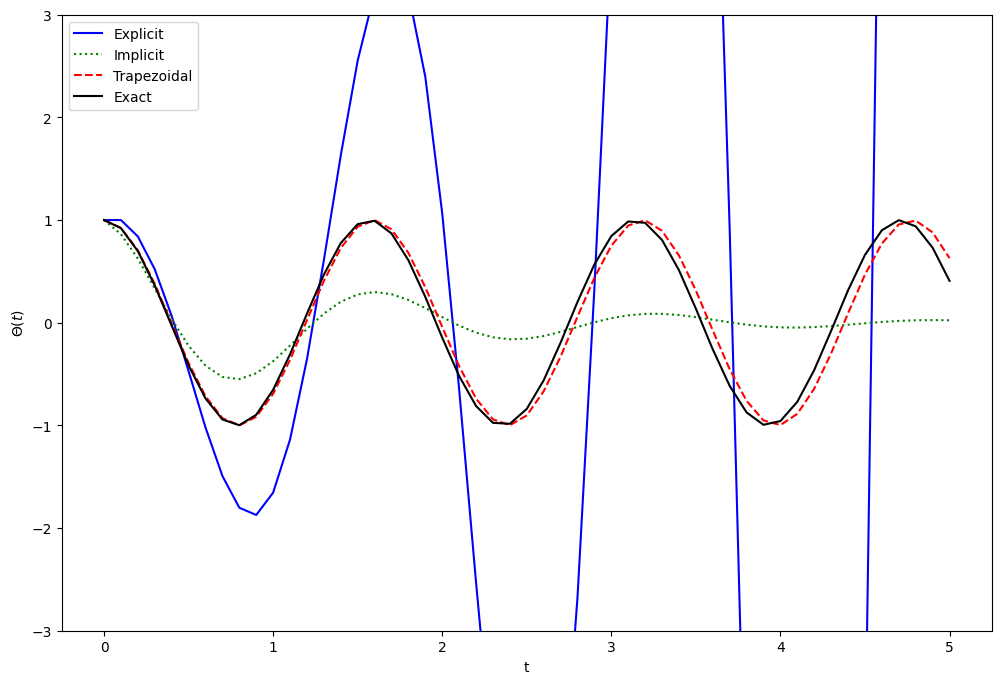

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

%matplotlib inline
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

Here is an example not copied from the textbook comparing Euler Explicit, Euler Implicit, and Trapezdoidal Formulas of a simple model equation that presents much more stable.

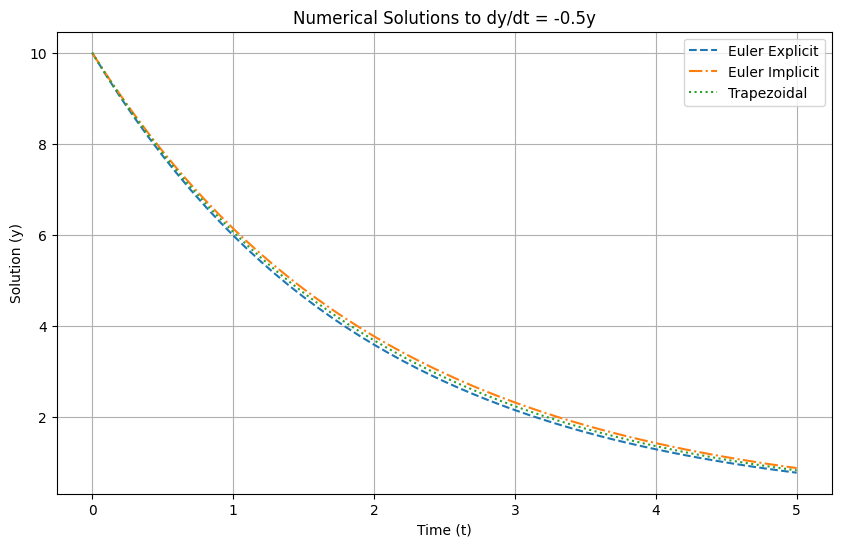

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(t, y)
def f(t, y):
    return -0.5 * y  # Example: Decay process

# Initialize parameters
t0 = 0
tf = 5
h = 0.1  # Step size
t_values = np.arange(t0, tf + h, h)  # Time values from t0 to tf

# Initial condition
y0 = 10

# Euler Explicit Method
def euler_explicit(f, t_values, y0, h):
    y_values = [y0]
    for t in t_values[:-1]:
        y_next = y_values[-1] + h * f(t, y_values[-1])
        y_values.append(y_next)
    return np.array(y_values)

# Euler Implicit Method
def euler_implicit(f, t_values, y0, h):
    y_values = [y0]
    for t in t_values[:-1]:
        # Solve for y_next using implicit method (needs an iterative solver in more complex problems)
        y_next = y_values[-1] / (1 + 0.5 * h)  # Linear equation for this simple case
        y_values.append(y_next)
    return np.array(y_values)

# Trapezoidal Method
def trapezoidal(f, t_values, y0, h):
    y_values = [y0]
    for t in t_values[:-1]:
        # First estimate using Euler Explicit
        y_pred = y_values[-1] + h * f(t, y_values[-1])
        # Correct using the Trapezoidal formula
        y_next = y_values[-1] + (h / 2) * (f(t, y_values[-1]) + f(t + h, y_pred))
        y_values.append(y_next)
    return np.array(y_values)

# Solve using the three methods
y_euler_explicit = euler_explicit(f, t_values, y0, h)
y_euler_implicit = euler_implicit(f, t_values, y0, h)
y_trapezoidal = trapezoidal(f, t_values, y0, h)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_euler_explicit, label="Euler Explicit", linestyle="--")
plt.plot(t_values, y_euler_implicit, label="Euler Implicit", linestyle="-.")
plt.plot(t_values, y_trapezoidal, label="Trapezoidal", linestyle=":")
plt.xlabel('Time (t)')
plt.ylabel('Solution (y)')
plt.title('Numerical Solutions to dy/dt = -0.5y')
plt.legend()
plt.grid(True)
plt.show()


**Section 22.5: Predictor-Corrector Methods + Runge Kutta**

Predictor-Corrector methods improve accuracy via a predictor to help estimate the solution and correct which assists in refinement.

*   In the midpoint method the predictor estimates the
solution halfway between $t_j$ and $t_{j+1}$ using $S(t_j+h/2) = S(t_j)+h/2 * F(t_j, S(t_j))$.
*   The corrector refines the estimate using $S(t_{j+1}) = S(t_j) +h*F(t_j + h/2, S(t_j+h/2))$.



Runge-Kutta methods conider more terms in order to improve accuracy.



*   There are second-order methods that use two intermediate points and estimate using $S(t+h) = S(t) +h*1/2(k_1+k_2)$.
*   And there are fourth-order method that use four intermediate points and estimate using $S(t_{j+1}) = S(t_j)+h/6(k_1+2k_2+2k_3+k_4)$.



**Section 22.6: Python ODE Solvers**

Python conveniently has packages available such as the scipy library that allows us to solve ODEs in a much more effecient manner.

Let us consider the ODE $\frac{dS(t)}{dt} = \sin(t)$.


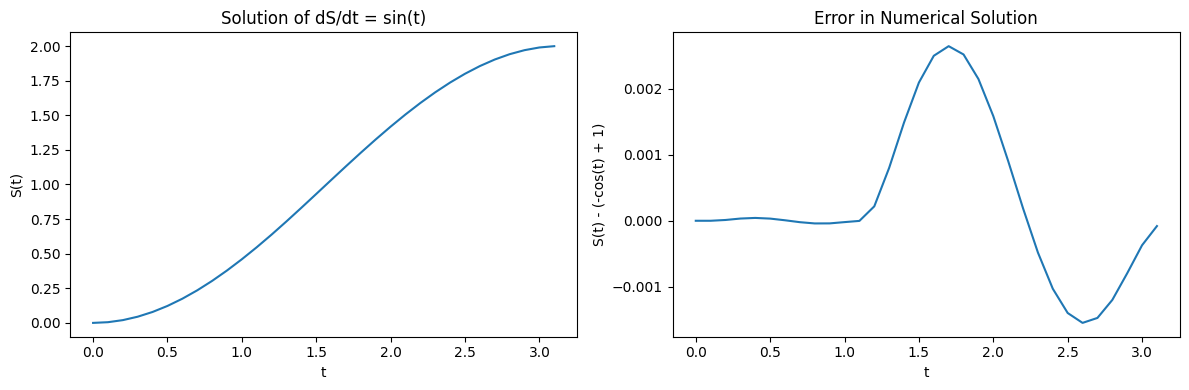

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

F = lambda t, s: np.sin(t)

t_eval = np.arange(0, np.pi, 0.1)

sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Solution of dS/dt = sin(t)')

plt.subplot(122)
plt.plot(sol.t, sol.y[0] - (-np.cos(sol.t) + 1))
plt.xlabel('t')
plt.ylabel('S(t) - (-cos(t) + 1)')
plt.title('Error in Numerical Solution')
plt.tight_layout()
plt.show()



And now using $rtol$ and $atol$ to make our approximation and exact solution that much more closer together.

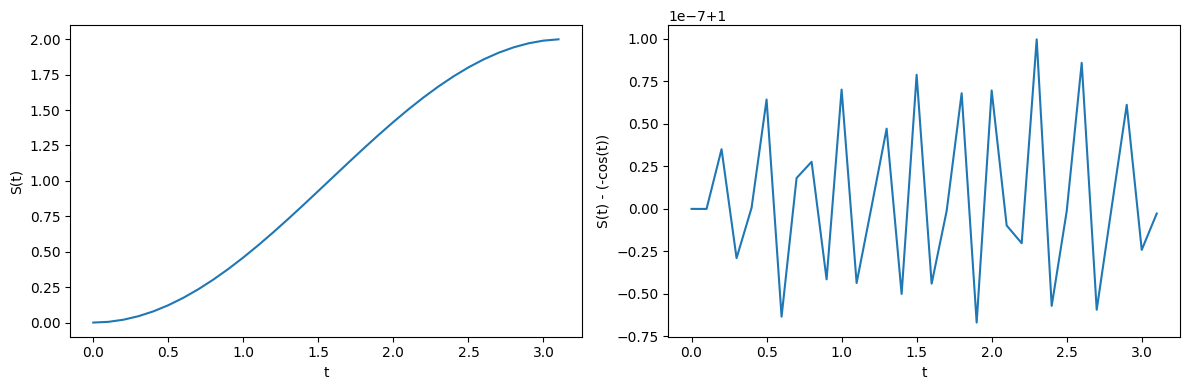

In [ ]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - (-np.cos(sol.t)))
plt.xlabel('t')
plt.ylabel('S(t) - (-cos(t))')
plt.tight_layout()
plt.show()